In [4]:
import kagglehub

In [5]:
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 1.55k/1.55k [00:00<00:00, 1.58MB/s]

Extracting files...
Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1


In [1]:
#load the dataset
import pandas as pd
data = pd.read_csv("Mall_customers.csv")

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data_encoded = pd.get_dummies(data, columns= ["Gender"],drop_first = True)
#convert boolean to integer 
data_encoded["Gender_Male"]=data_encoded["Gender_Male"].astype(int)
data_encoded.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [6]:
# or can use OneHot encoder
from sklearn.preprocessing import OneHotEncoder
#create encoder
encoder = OneHotEncoder(drop='first',sparse_output = False)
#Transform Gender column
gender_encoded = encoder.fit_transform(data[["Gender"]])
#convert to dataframe
gender_df = pd.DataFrame(gender_encoded,columns=["Gender_Male"])
#concatenate with original dataframe
data_encoded2 = pd.concat([data.drop(columns=["Gender"]),gender_df],axis=1)
#get the first few rows of the dataframe
data_encoded2.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1.0
1,2,21,15,81,1.0
2,3,20,16,6,0.0
3,4,23,16,77,0.0
4,5,31,17,40,0.0


In [7]:
# we use ordinal encoding when the categories have a meaningful order

In [8]:
data_encoded.value_counts().sum()

200

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
Males_spending_score_category_totals= data_encoded.pivot_table(values = "Gender_Male" , index = "Spending Score (1-100)",aggfunc="sum")
Males_spending_score_category_totals.head()

,Gender_Male
Spending Score (1-100),
1,2
3,1
4,2
5,2
6,0


##### Total Males above 50 spending score

In [11]:
Males_above50score=Males_spending_score_category_totals.loc[Males_spending_score_category_totals.index >= 50]
Males_above50score.head()

,Gender_Male
Spending Score (1-100),
50,0
51,2
52,2
53,0
54,1


##### Top 10 Scores for Male_above50score

In [12]:
top_10_male_spenders=Males_above50score.sort_values("Gender_Male",ascending = False)
top_10_male_spenders.head()

,Gender_Male
Spending Score (1-100),
55,4
75,3
59,3
92,3
56,3


In [13]:
top_10_male_spenders=top_10_male_spenders.reset_index() # reset index to make "spending score" a column
top_10_male_spenders= top_10_male_spenders[top_10_male_spenders["Gender_Male"] >0]

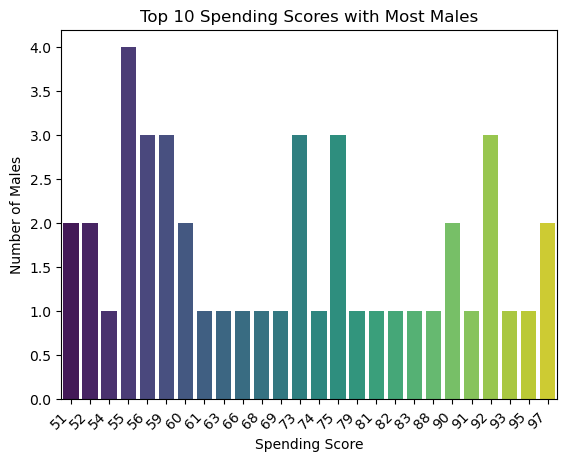

In [14]:
sns.barplot(x="Spending Score (1-100)", y="Gender_Male", data=top_10_male_spenders, palette="viridis")
plt.xticks(rotation=45,ha="right")
plt.title("Top 10 Spending Scores with Most Males")
plt.xlabel("Spending Score")
plt.ylabel("Number of Males")
plt.show()

##### How is spending score distributed across different ages?

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

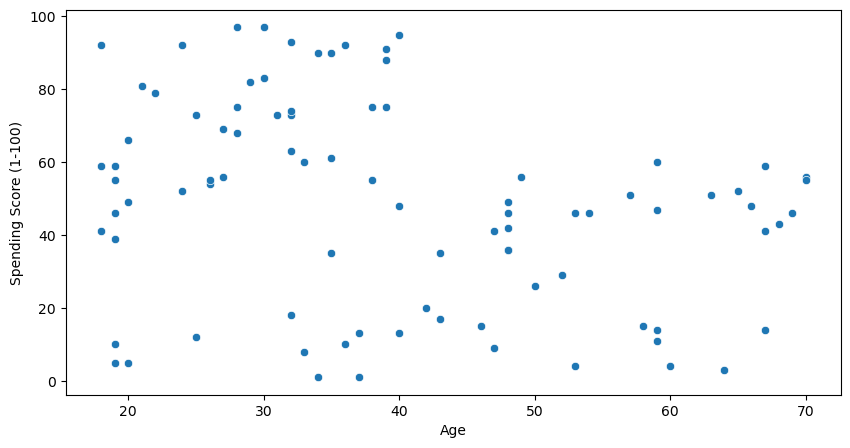

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    x="Age",
    y="Spending Score (1-100)",
    data= data_encoded[data_encoded["Gender_Male"]==1.0])

In [22]:
data["Annual Income"]=[x*1000 for x in data["Annual Income (k$)"]]
data= data.drop(['Annual Income (k$)'],axis =1)

In [23]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Spending Score (1-100)',
       'Annual Income'],
      dtype='object')

In [26]:
def box_plots(variable):
    cols = ['Annual Income','Spending Score (1-100)','Age']
    i=0
    plt.figure(figsize=(30,20))
    for col in cols:
        i+=1
        plt.subplot(1,3,i)
        sns.boxplot(x=variable,y=col, data=data)
        

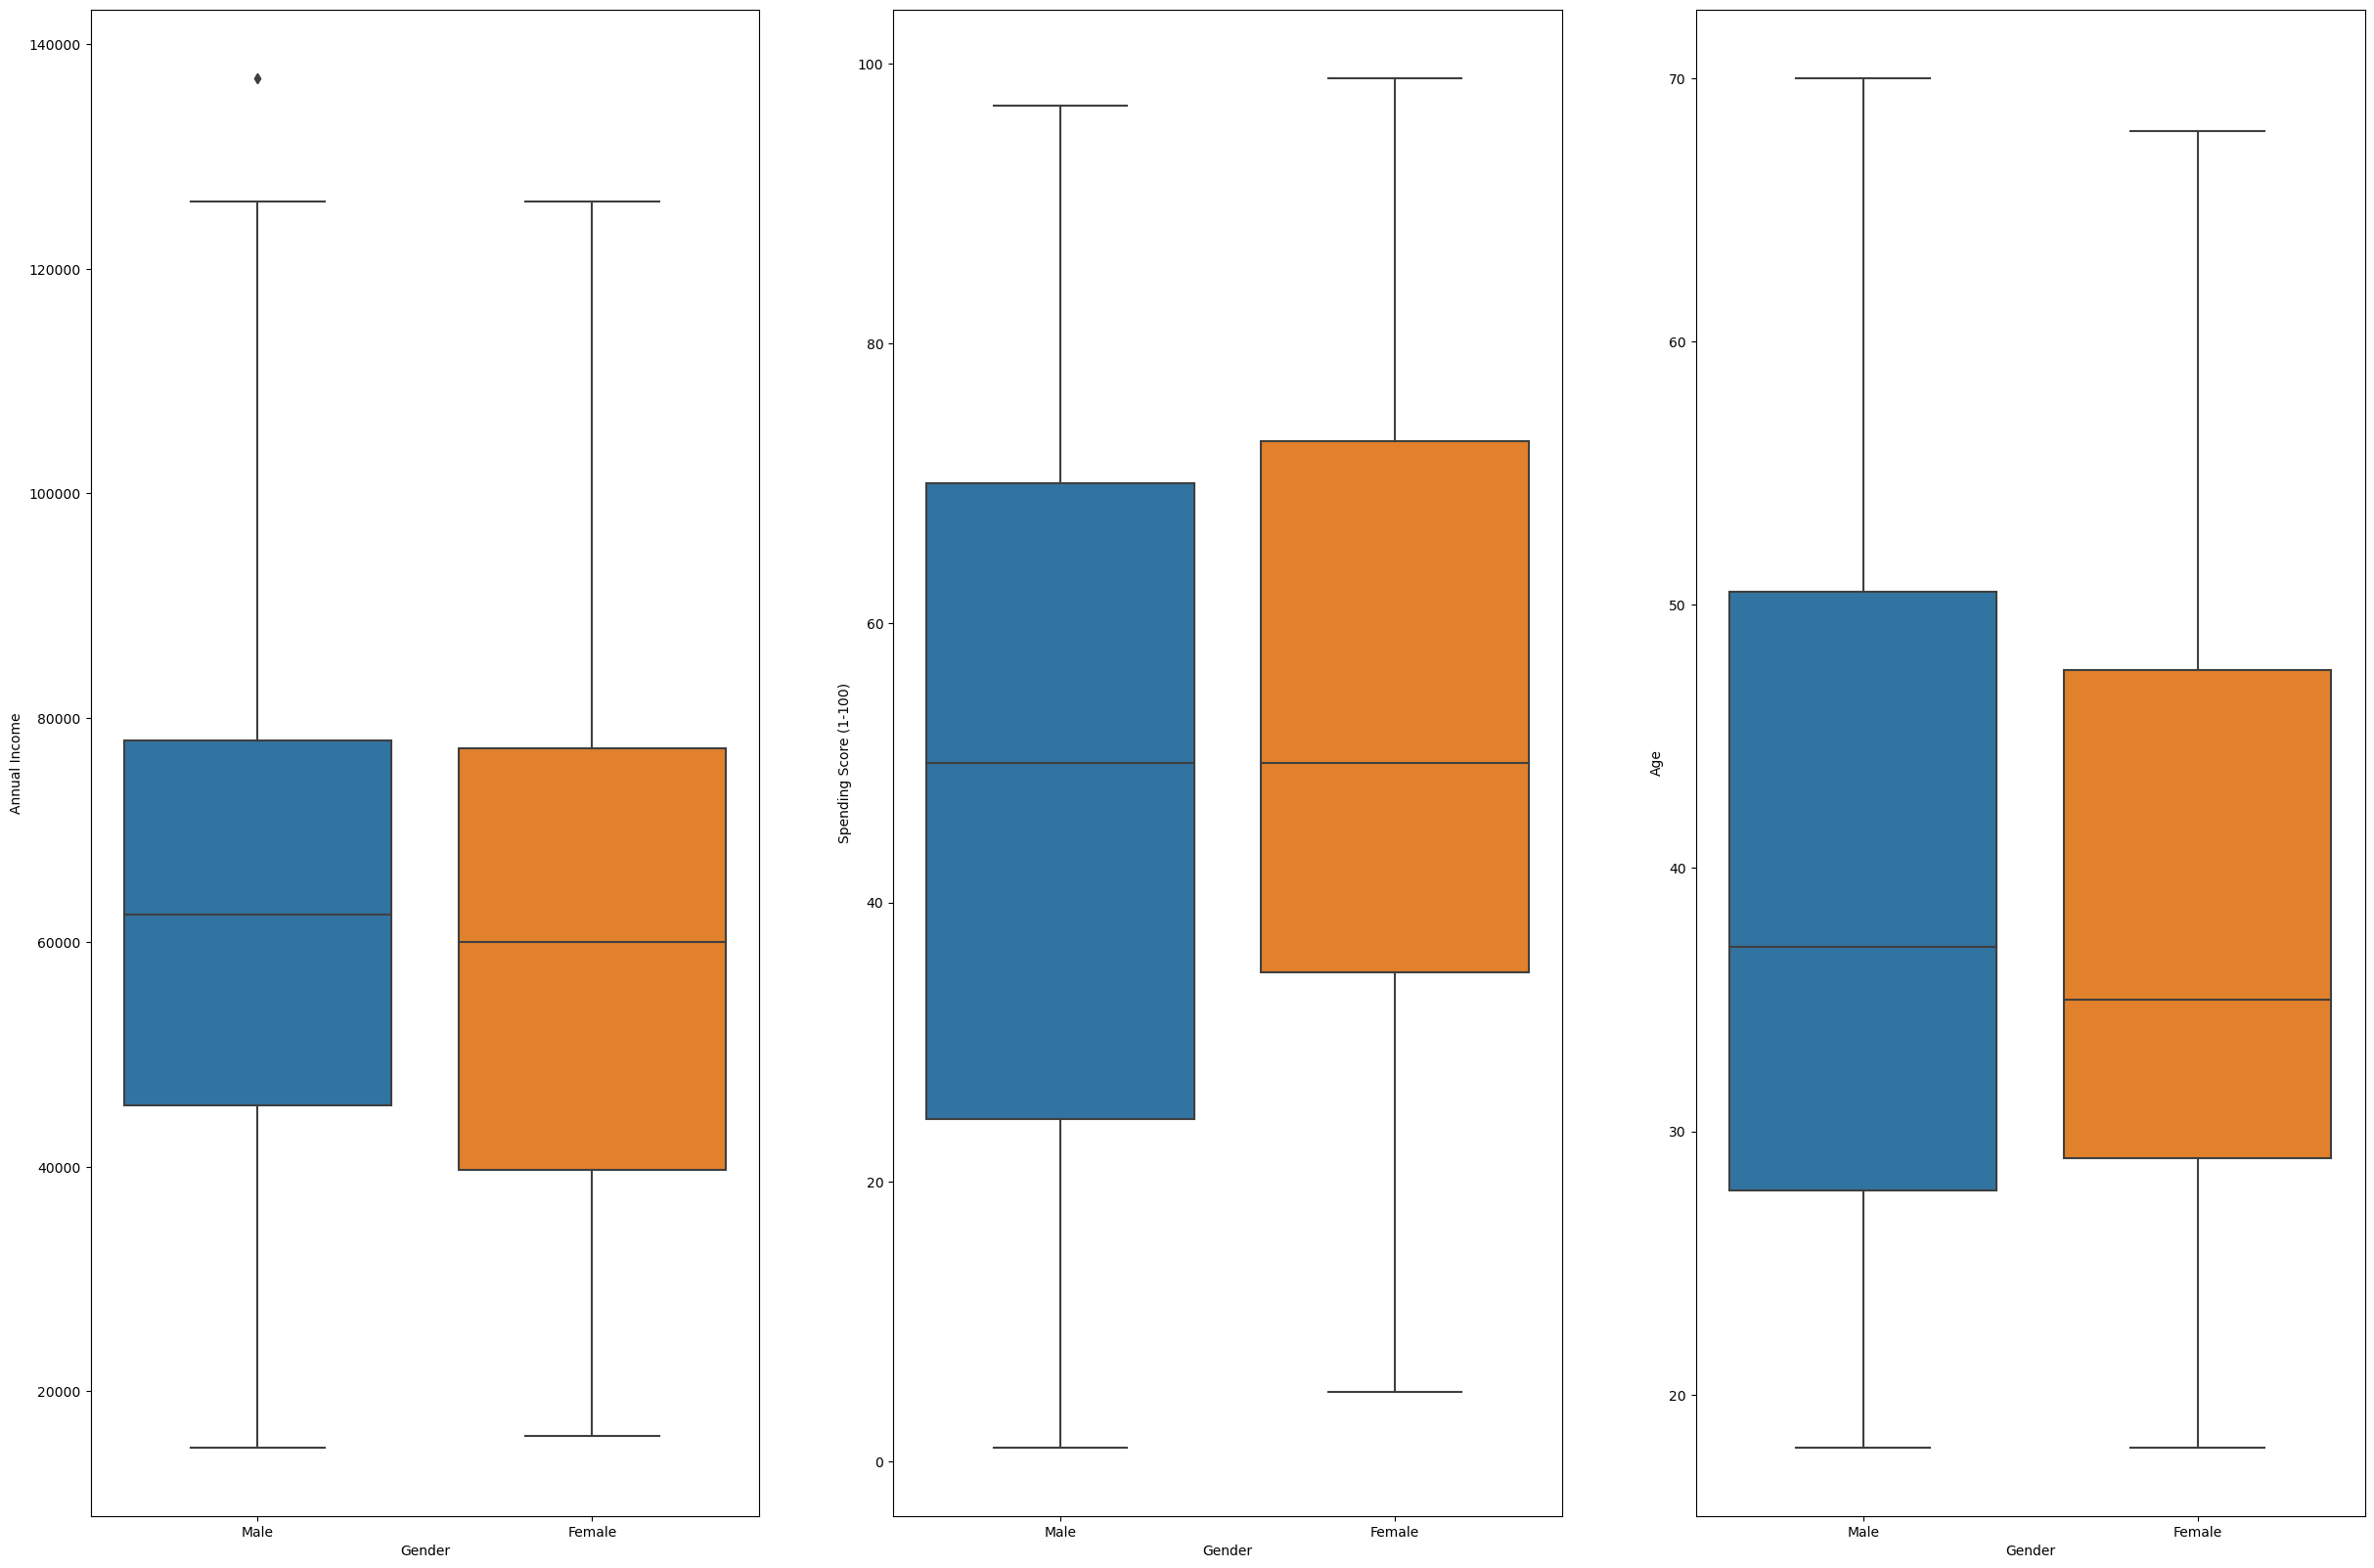

In [27]:
box_plots('Gender')

<Axes: xlabel='Gender', ylabel='count'>

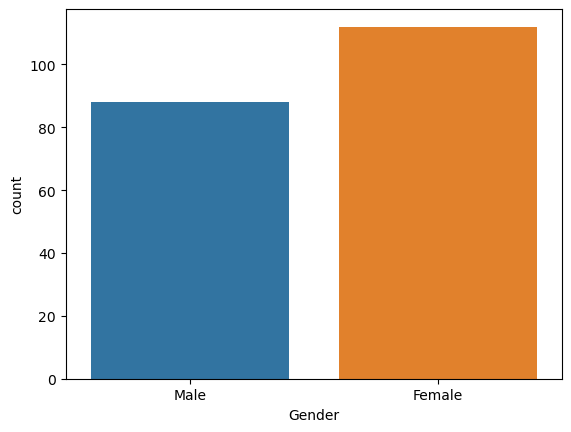

In [28]:
sns.countplot(x='Gender', data=data)

In [31]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
cols = ['Age',"Annual Income",'Spending Score (1-100)']
mss = MinMaxScaler()
def scaler(value):
    x=np.array(data[value]).reshape(-1,1)
    return mss.fit_transform(x)

for col in cols:
    data[col] = scaler(col)

In [32]:
data =data.drop(['CustomerID'],axis=1)
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data['Gender']= lb.fit_transform(data['Gender'])

In [33]:
data.head()

,Gender,Age,Spending Score (1-100),Annual Income
0,1,0.019231,0.387755,0.000000
1,1,0.057692,0.816327,0.000000
2,0,0.038462,0.051020,0.008197
3,0,0.096154,0.775510,0.008197
4,0,0.250000,0.397959,0.016393


In [37]:
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier

# Assuming 'data' is a Pandas DataFrame
x = np.array(data.drop(['Gender'], axis=1))
y = np.array(data['Gender'])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)

# Define classifiers
names = ['knn', 'svc', 'rfc', 'abc', 'dtc', 'gnb', 'mnb', 'mlp']
classifiers = [
    KNeighborsClassifier(3),
    SVC(C=0.009, gamma=3),
    RandomForestClassifier(n_estimators=50),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),  # Fixed spelling here
    GaussianNB(),
    MultinomialNB(),
    MLPClassifier()
]

# Train classifiers and print scores
for n, c in zip(names, classifiers):
    c.fit(x_train, y_train)
    score = c.score(x_test, y_test)
    print(f"Score achieved by {n}: {score * 100:.2f}%")


Score achieved by knn: 47.50%
Score achieved by svc: 57.50%
Score achieved by rfc: 52.50%
Score achieved by abc: 57.50%
Score achieved by dtc: 52.50%
Score achieved by gnb: 62.50%
Score achieved by mnb: 57.50%
Score achieved by mlp: 60.00%


#### Note:

 Can't use regression models since Gender is categorical

The Gaussian Naive Bayes performs fairly well with an accuracy of 62.5% 

The Gaussina Naive Bayes is useful when features are continuous and follow a normal  distribution